In [2]:
%matplotlib  inline
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten # Flatten : CNN결과를 1차원으로
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
batch_size = 128
num_classes = 10 # multi category, loss : categorical_crossentropy
epochs = 12
img_rows, img_cols = 28, 28
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# channel_first, channel_last
# https://tykimos.github.io/2017/01/27/CNN_Layer_Talk/

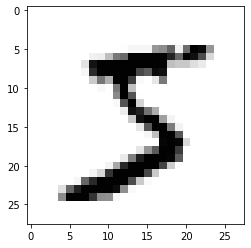

In [25]:
first_image = x_train[0, :, :]
plt.imshow(first_image, cmap=plt.cm.Greys)
plt.show()

In [26]:
# channel_first, channel_last
# x_train = x_train.reshape(x_train.shape[0], 1, 28, 28) # channel_first (60000, 1, 28, 28)
# x_test = x_test.reshape(x_test.shape[0], 1, 28, 28)    #               (10000, 1, 28, 28)
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)   # channel_last  (60000, 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)      #               (10000, 28, 28, 1)

x_train = x_train.astype('float32')       # 타입변경 => 255로 나누기 위해서
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape :', x_train.shape)
print('x_test shape :', x_test.shape)
print(x_train.shape[0], 'traing samples')
print(x_test.shape[0], 'test samples')

x_train shape : (60000, 28, 28, 1)
x_test shape : (10000, 28, 28, 1)
60000 traing samples
10000 test samples


In [27]:
y_train = keras.utils.to_categorical(y_train, num_classes) # num_classes 때문에 target을  categorical한다.
y_test = keras.utils.to_categorical(y_test, num_classes)

In [28]:
model = Sequential()
# 32 : output_filter, 3x3 : 필터 사이즈
# 28x28 => (128(batch_size),26(28-3+1),26,32) 
# padding : valid(모서리특징 버린다, 별로 중요하지 않다.), same(28,28)(모서리특징 산다.)
model.add(Conv2D(32, 3, 3, activation = 'relu', input_shape=(28, 28, 1))) # input_shape도  channel에 맞게 한다. relu로 음수제거
model.add(Conv2D(64, 3, 3, activation = 'relu')) # 128(장수), 24, 24, 64
model.add(MaxPooling2D(pool_size=(2,2))) # ?(128), 12(24/2), 12, 64
model.add(Dropout(0.25))
model.add(Flatten()) # 12x12x64 => 1차원 9216
# FFNN, FC(Fully-Connected)
model.add(Dense(128, activation='relu')) # 가중치 : 9216x128 => 128x128
model.add(Dropout(0.5)) # 계산회로만 생략
model.add(Dense(10, activation = 'softmax')) # 가중치 : 128x10
# 1출력 : 28x10

C:\Users\ICT01_05\Anaconda3\envs\tf_test\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
C:\Users\ICT01_05\Anaconda3\envs\tf_test\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  


In [29]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])
# train, test 과적합 될 수 있어서 validation추가
# train, validation, test
class AccuracyHistory(keras.callbacks.Callback) : # epoch마다 accuracy를 저장
    # 오버라이딩(재정의)
    def on_train_begin(self, logs={}) : # 훈련시작시 이벤트 시작
        self.acc = []
    
    def on_epoch_end(self, batch, logs = {}) :
        self.acc.append(logs.get('accuracy'))
        
history = AccuracyHistory()
model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, verbose = 1, validation_data = (x_test, y_test),
         callbacks=[history])


Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 10s 174us/step - loss: 0.2545 - accuracy: 0.9221 - val_loss: 0.0569 - val_accuracy: 0.9822
Epoch 2/12
60000/60000 [==============================] - 10s 165us/step - loss: 0.0865 - accuracy: 0.9747 - val_loss: 0.0411 - val_accuracy: 0.9866
Epoch 3/12
60000/60000 [==============================] - 10s 163us/step - loss: 0.0650 - accuracy: 0.9810 - val_loss: 0.0360 - val_accuracy: 0.9867
Epoch 4/12
60000/60000 [==============================] - 10s 162us/step - loss: 0.0536 - accuracy: 0.9842 - val_loss: 0.0306 - val_accuracy: 0.9890
Epoch 5/12
60000/60000 [==============================] - 10s 167us/step - loss: 0.0478 - accuracy: 0.9856 - val_loss: 0.0286 - val_accuracy: 0.9900
Epoch 6/12
60000/60000 [==============================] - 10s 160us/step - loss: 0.0415 - accuracy: 0.9870 - val_loss: 0.0287 - val_accuracy: 0.9903
Epoch 7/12
60000/60000 [==============================] 

In [30]:
score = model.evaluate(x_test, y_test, verbose =0)
score # [loss, accuracy]

[0.026123963086028563, 0.9922999739646912]

In [31]:
print("loss : ", score[0])
print("accuracy : ", score[1])

loss :  0.026123963086028563
accuracy :  0.9922999739646912


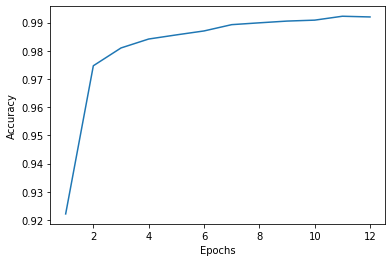

In [32]:
plt.plot(range(1,13), history.acc)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [33]:
K.set_image_data_format('channel_first') # or channel_last

ValueError: Unknown data_format: channel_first

# 모델 저장 / 로딩

In [34]:
model.save("model_mnist.h5") # HDFS(Hadoop file system) : model 구조 전체 저장
                             # 가중치, 구조, optimization stage 등이 저장
                             # json으로도 저장(단, 구조와 가중치는 별도로 저장) => web에서도 tensorflow 지원
                             # import tensorflow.js
print("모델이 저장되었습니다.")

from keras.models import load_model
model = load_model("model_mnist.h5")
print("모델이 로딩되었습니다.")

model.summary()

모델이 저장되었습니다.
모델이 로딩되었습니다.
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_7 (Dropout)         

In [35]:
# 레이어 정보 확인
l1 = model.layers[0]
l2 = model.layers[1]
print(l1.name)
print(l1.input_shape)
print(l1.activation)
print(l1.output_shape)

conv2d_7
(None, 28, 28, 1)
<function relu at 0x000002AFD75A8E58>
(None, 26, 26, 32)


# imageDataGenerator

C:\Users\ICT01_05\Anaconda3\envs\tf_test\lib\site-packages\keras_preprocessing\image\image_data_generator.py:336: UserWarning: This ImageDataGenerator specifies `zca_whitening`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


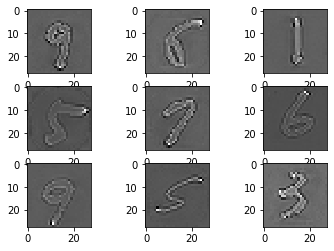

In [36]:
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
from keras import backend as K
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
datagen = ImageDataGenerator(horizontal_flip=True, vertical_flip = True)
datagen = ImageDataGenerator(width_shift_range = 0.2, height_shift_range = 0.2)
# 이미지 백색화 => noise 제거(변수간 상관도를 없앰 : PCA)
datagen = ImageDataGenerator(rotation_range = 90)
datagen = ImageDataGenerator(zca_whitening = True)
datagen.fit(X_train)
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size = 9, # flow : 내보낸다.
                                     save_to_dir = 'images', save_prefix = 'aug', save_format='png'):    # augment
    for i in range(0, 9) :
        pyplot.subplot(330 + 1 + i)
        pyplot.imshow(X_batch[i].reshape(28, 28),
                     cmap = pyplot.get_cmap('gray'))
    pyplot.show()
    break

In [37]:
from keras.datasets import cifar10
from keras.optimizers import SGD, Adam, RMSprop
from keras.utils import np_utils
# airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck 분류문제
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()
print("X_train shape : ", X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')
NB_CLASSES = 10
Y_train = np_utils.to_categorical(Y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(Y_test, NB_CLASSES)

X_train = X_train.astype("float32")
X_test = X_test.astype("float32")
X_test /= 255
X_test /= 255

X_train shape :  (50000, 32, 32, 3)
50000 train samples
10000 test samples


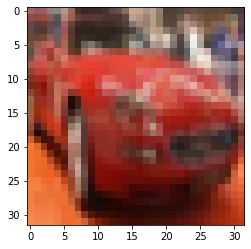

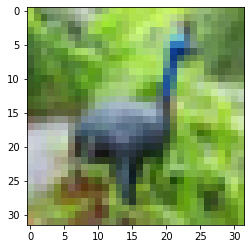

In [39]:
plt.imshow(X_train[5])
plt.grid(False)
plt.show()
plt.imshow(X_train[6])
plt.grid(False)
plt.show()

In [40]:
IMG_CHANNELS = 3
IMG_ROWS = 32
IMG_COLS = 32
BATCH_SIZE = 128
NB_EPOCH = 40
NB_CLASSES = 10
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = RMSprop()

In [41]:
from keras.layers import Activation
model = Sequential()
# residual망의 영향
# 32x32x3=> 가중치 : 32x32x32(padding이 same이므로)
model.add(Conv2D(32, kernel_size = 3, padding = 'same', input_shape = (IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
model.add(Activation('relu'))
model.add(Conv2D(32, kernel_size = 3, padding = 'same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

In [42]:
model.add(Conv2D(64, kernel_size=3, padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

C:\Users\ICT01_05\Anaconda3\envs\tf_test\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3))`
  This is separate from the ipykernel package so we can avoid doing imports until


In [43]:
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))
model.summary()
model.compile(loss="categorical_crossentropy", optimizer=OPTIM, metrics=['accuracy'])

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_7 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_8 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 16, 16, 64)       

In [44]:
history = model.fit(X_train, Y_train, batch_size = BATCH_SIZE, epochs = NB_EPOCH, 
                   validation_split = VALIDATION_SPLIT, verbose = VERBOSE)

Train on 40000 samples, validate on 10000 samples
Epoch 1/40
40000/40000 [==============================] - 10s 249us/step - loss: 1.7648 - accuracy: 0.3652 - val_loss: 1.4983 - val_accuracy: 0.4584
Epoch 2/40
40000/40000 [==============================] - 10s 247us/step - loss: 1.3269 - accuracy: 0.5297 - val_loss: 1.1003 - val_accuracy: 0.6149
Epoch 3/40
40000/40000 [==============================] - 10s 243us/step - loss: 1.1207 - accuracy: 0.6082 - val_loss: 1.0754 - val_accuracy: 0.6211
Epoch 4/40
40000/40000 [==============================] - 10s 250us/step - loss: 0.9926 - accuracy: 0.6521 - val_loss: 0.9711 - val_accuracy: 0.6557
Epoch 5/40
40000/40000 [==============================] - 10s 246us/step - loss: 0.8938 - accuracy: 0.6884 - val_loss: 0.8806 - val_accuracy: 0.6980
Epoch 6/40
40000/40000 [==============================] - 10s 245us/step - loss: 0.8226 - accuracy: 0.7138 - val_loss: 0.8767 - val_accuracy: 0.6887
Epoch 7/40
40000/40000 [==============================] 

In [45]:
datagen = ImageDataGenerator(# 똑같은 데이터 : Random 순서
                             featurewise_center = False, 
                             samplewise_center = False, 
                             featurewise_std_normalization=False,
                            samplewise_std_normalization=False, 
                             zca_whitening=False,  # 이미지 PCA 노이즈제거
                             rotation_range=0, 
                             width_shift_range=0.1,
                            height_shift_range = 0.1, 
                             horizontal_flip = True, 
                             vertical_flip = False)
datagen.fit(X_train)

In [17]:
model.fit_generator(datagen.flow(X_train, Y_train, batch_size = BATCH_SIZE),
                    samples_per_epoch = X_train.shape[0], nb_epoch = NB_EPOCH,
                    verbose = VERBOSE)

C:\Users\ICT01_05\Anaconda3\envs\tf_test\lib\site-packages\ipykernel_launcher.py:3: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\ICT01_05\Anaconda3\envs\tf_test\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras.pre..., verbose=1, steps_per_epoch=390, epochs=40)`
  This is separate from the ipykernel package so we can avoid doing imports until



Epoch 1/40
390/390 [==============================] - 16s 42ms/step - loss: 1.8268 - accuracy: 0.3386
Epoch 2/40
390/390 [==============================] - 16s 41ms/step - loss: 1.3929 - accuracy: 0.5009
Epoch 3/40
390/390 [==============================] - 16s 41ms/step - loss: 1.2066 - accuracy: 0.5718
Epoch 4/40
390/390 [==============================] - 16s 41ms/step - loss: 1.1022 - accuracy: 0.6131
Epoch 5/40
390/390 [==============================] - 16s 40ms/step - loss: 1.0250 - accuracy: 0.6368
Epoch 6/40
390/390 [==============================] - 16s 40ms/step - loss: 0.9742 - accuracy: 0.6590
Epoch 7/40
390/390 [==============================] - 16s 41ms/step - loss: 0.9218 - accuracy: 0.6766
Epoch 8/40
390/390 [==============================] - 16s 40ms/step - loss: 0.8905 - accuracy: 0.6905
Epoch 9/40
390/390 [==============================] - 16s 40ms/step - loss: 0.8650 - accuracy: 0.6968
Epoch 10/40
390/390 [==============================] - 16s 41ms/step - loss: 0.85

In [46]:
score = model.evaluate(X_test, Y_test, batch_size = BATCH_SIZE, verbose = VERBOSE)
print("\nTest score : ", score[0])
print("\nTest accuracy : ", score[1])

10000/10000 [==============================] - 1s 93us/step

Test score :  0.7671592515945435

Test accuracy :  0.757099986076355


In [19]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

# json

In [51]:
model_json = model.to_json()
open('cifar10_architecture.json', 'w').write(model_json)
model.save_weights('cifar10_weights.h5' ,overwrite=True)

In [53]:
from keras.models import model_from_json
json_file = open('cifar10_architecture.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights('cifar10_weights.h5')
print("Loaded model from disk")

Loaded model from disk


# accuracy graph를 출력

In [53]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])

class AccuracyHistory2(keras.callbacks.Callback) : # epoch마다 accuracy를 저장
    # 오버라이딩(재정의)
    def on_train_begin(self, logs={}) : # 훈련시작시 이벤트 시작
        self.acc = []
    
    def on_epoch_end(self, batch, logs = {}) :
        self.acc.append(logs.get('accuracy'))
        
history = AccuracyHistory2()

In [48]:
history = model.fit_generator(datagen.flow(X_train, Y_train, batch_size = BATCH_SIZE),
                    samples_per_epoch = X_train.shape[0], nb_epoch = NB_EPOCH,
                    verbose = VERBOSE, callbacks=[history])

C:\Users\ICT01_05\Anaconda3\envs\tf_test\lib\site-packages\ipykernel_launcher.py:3: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\ICT01_05\Anaconda3\envs\tf_test\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras.pre..., verbose=1, callbacks=[<__main__..., steps_per_epoch=390, epochs=40)`
  This is separate from the ipykernel package so we can avoid doing imports until


Epoch 1/40
390/390 [==============================] - 15s 39ms/step - loss: 1.0215 - accuracy: 0.6694
Epoch 2/40
390/390 [==============================] - 15s 39ms/step - loss: 0.9422 - accuracy: 0.6920
Epoch 3/40
390/390 [==============================] - 15s 40ms/step - loss: 0.9158 - accuracy: 0.7004
Epoch 4/40
390/390 [==============================] - 15s 39ms/step - loss: 0.8903 - accuracy: 0.7055
Epoch 5/40
390/390 [==============================] - 15s 39ms/step - loss: 0.8754 - accuracy: 0.7110
Epoch 6/40
390/390 [==============================] - 15s 39ms/step - loss: 0.8665 - accuracy: 0.7120
Epoch 7/40
390/390 [==============================] - 15s 39ms/step - loss: 0.8568 - accuracy: 0.7197
Epoch 8/40
390/390 [==============================] - 16s 40ms/step - loss: 0.8513 - accuracy: 0.7199
Epoch 9/40
390/390 [==============================] - 15s 39ms/step - loss: 0.8355 - accuracy: 0.7219
Epoch 10/40
390/390 [==============================] - 16s 40ms/step - loss: 0.833

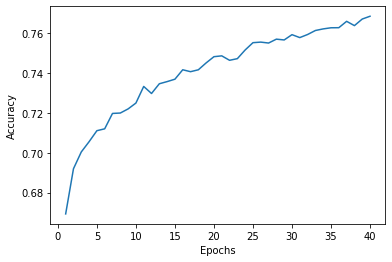

In [49]:
plt.plot(range(1,41), history.acc)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [52]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

AttributeError: 'AccuracyHistory' object has no attribute 'history'

# 이미지 cat, dog를 다운로드한 다음 위의 모델로 예측해보세요.

In [54]:
import numpy as np
from imageio import imread
from skimage.transform import resize
from keras.models import model_from_json
img_names = ['cat.jpg', 'dog.jpg']
imgs = [resize(imread(img_name), (32,32)).astype('float32')
       for img_name in img_names]
imgs = np.array(imgs)/255
predictions = model.predict_classes(imgs)
print(predictions)

[4 4]


# 전이(transfer learning) 학습 Application
- 반지도학습(일부데이터의 라벨이 무) : Knn, Trenductive SVM
- 가중치 활용 : 그대로 적용
- 가중치 중 일부만 활용
- FFNN 부분만 학습해서 사용

# pre-trained, fine-tuning(FFNN부분만 Domain knowledge)

PIL image size (224, 224)


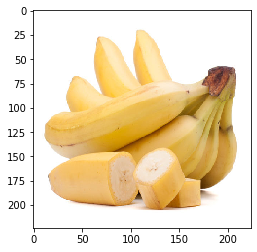

numpy array size (224, 224, 3)
image batch size (1, 224, 224, 3)
[[('n07753592', 'banana', 0.92170644), ('n07716906', 'spaghetti_squash', 0.023380999), ('n07717556', 'butternut_squash', 0.01665978)]]


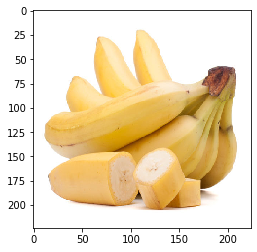

In [58]:
import PIL
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array # 배열로 만듬
from keras.applications.imagenet_utils import decode_predictions
import numpy as np
from keras.applications.resnet50 import ResNet50
from keras.applications import resnet50
filename = 'banana.jpg'
original = load_img(filename, target_size = (224, 224)) # 사이즈 fix
print('PIL image size', original.size)
plt.imshow(original)
plt.show()

numpy_image = img_to_array(original)
plt.imshow(np.uint8(numpy_image))
print('numpy array size', numpy_image.shape)
# 차원확대하는 이유 : 여러장 처리(전제조건), 1장이니깐 3차원을 4차원으로 확장(여러장인척)
image_batch = np.expand_dims(numpy_image, axis = 0)
print('image batch size', image_batch.shape)
processed_image = resnet50.preprocess_input(image_batch.copy()) # 왜 copy하는가
# dense을 이용해서 모델을 생성
# 라벨 => 확률
resnet_model = resnet50.ResNet50(weights = 'imagenet') # weights = 'imagenet'없으면 훈련이 안된 가중치로 초기화
# softmax 확률 (상위 3개로 예측)
predictions = resnet_model.predict(processed_image)
label = decode_predictions(predictions, top=3)
print(label)


In [ ]:
# tf.keras
# fine-tunning ; FFNN부분만 학습

In [1]:
from numpy.random import randn
import pathlib
import random
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from matplotlib.image import imread
from keras.preprocessing import image
# tf.enable_eager_execution()
AUTOTUNE = tf.data.experimental.AUTOTUNE
data_dir = "C:\\Users\\ICT01_05\\Desktop\\전달\\flowers\flower_photos"
data_dir = pathlib.Path(data_dir)
label_names={'daisy' : 0, 'dandelion' : 1, 'roses' : 2, 'sunflowers' : 3, 'tulips' : 4}
label_key = ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

C:\Users\ICT01_05\Anaconda3\envs\tf_test\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\ICT01_05\Anaconda3\envs\tf_test\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\ICT01_05\Anaconda3\envs\tf_test\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\ICT01_05\Anaconda3\envs\tf_test\lib\site-packages

In [43]:
from numpy.random import randn
import pathlib
import random
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from matplotlib.image import imread
from keras.preprocessing import image
#tf.enable_eager_execution()
AUTOTUNE = tf.data.experimental.AUTOTUNE
data_dir = "C:/Users/ICT01_05/Desktop/전달/flowers/flower_photos"
data_dir = pathlib.Path(data_dir)
label_names={'daisy':0,'dandelion':1,'roses':2,'sunflowers':3,'tulips':4}
label_key = ['daisy','dandelion','rose','sunflowers','tulips']

In [44]:
all_images = list(data_dir.glob('*/*'))
all_images = [str(path) for path in all_images]
random.shuffle(all_images)
all_labels = [label_names[pathlib.Path(path).parent.name] for path in all_images]
data_size = len(all_images)
train_test_split=(int)(data_size*0.2)
x_train = all_images[train_test_split:]
x_test = all_images[:train_test_split]
y_train = all_labels[train_test_split:]
y_test = all_labels[:train_test_split]
IMG_SIZE = 160
BATCH_SIZE = 32

In [45]:
def _parse_data(x,y) :
    image = tf.read_file(x) # 파일에는 헤더파일(압축방법)
    image = tf.image.decode_jpeg(image, channels = 3) # color
    image = tf.cast(image, tf.float32) # 데이터를 나누기 위해서
    image = (image/127.5)-1   #  -1 ~ 1사이의 사이즈로 나타내기 위해 2로 나누고 1을 빼준다.
    # 이미지 사이즈 통일
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    return image, y
def _input_fn(x,y) :
    # 기본단위 요소로 분해
    ds = tf.data.Dataset.from_tensor_slices((x,y)) # dataset을 생성
    ds = ds.map(_parse_data # 데이터마다 함수를 적용
    ds = ds.shuffle(buffer_size = data_size) # 충분한 공간확보
                # buffer : 거쳐가는 기억공간
    ds = ds.repeat() # 데이터가 부족하면 처음부터 다시 시작
    ds = ds.batch(BATCH_SIZE) # minibatch사이즈
    ds = ds.prefetch(buffer_size = AUTOTUNE)
    return ds
train_ds = _input_fn(x_train, y_train)
validation_ds = _input_fn(x_test, y_test)

In [46]:
IMG_SHAPE = (IMG_SIZE, IMG_SIZE, 3)
# include_top = False 인 경우 input_shape = IMG_SHAPE을 지정
# convoultion에 대한 가중치학습이 無
VGG16_MODEL  = tf.keras.applications.VGG16(input_shape = IMG_SHAPE, include_top = False, weights = 'imagenet')

In [47]:
VGG16_MODEL.trainable = False
# flatten(가중치 필요)이 없다. GlobalAveragePooling2D flatten대신
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
# FFNN의 가중치는 학습
prediction_layer = tf.keras.layers.Dense(len(label_names), activation='softmax')

In [48]:
model = tf.keras.Sequential([ # modle (vgg16 가중치 + FFNN 가중치 학습)
    VGG16_MODEL,
    global_average_layer,
    prediction_layer
])

In [49]:
model.compile(optimizer=tf.train.AdamOptimizer(),
             loss=tf.keras.losses.sparse_categorical_crossentropy,
             metrics=["accuracy"])

In [51]:
history = model.fit(train_ds, epochs = 100, steps_per_epoch = 2, validation_steps=2)

Epoch 1/100
2/2 [==============================] - 9s 4s/step - loss: 1.6554 - acc: 0.1719
Epoch 2/100
2/2 [==============================] - 0s 184ms/step - loss: 1.6974 - acc: 0.2031
Epoch 3/100
2/2 [==============================] - 0s 183ms/step - loss: 1.6327 - acc: 0.2344
Epoch 4/100
2/2 [==============================] - 0s 184ms/step - loss: 1.5708 - acc: 0.3438
Epoch 5/100
2/2 [==============================] - 0s 183ms/step - loss: 1.5806 - acc: 0.3281
Epoch 6/100
2/2 [==============================] - 0s 184ms/step - loss: 1.4767 - acc: 0.4062
Epoch 7/100
2/2 [==============================] - 0s 183ms/step - loss: 1.5611 - acc: 0.2969
Epoch 8/100
2/2 [==============================] - 0s 182ms/step - loss: 1.4721 - acc: 0.4062
Epoch 9/100
2/2 [==============================] - 0s 184ms/step - loss: 1.5012 - acc: 0.3750
Epoch 10/100
2/2 [==============================] - 0s 183ms/step - loss: 1.4392 - acc: 0.4531
Epoch 11/100
2/2 [==============================] - 0s 179ms/s

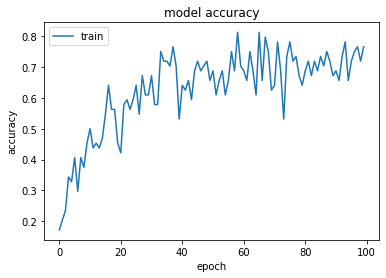

In [57]:
plt.plot(history.history['acc'])
# plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()